# Comparision Across Sites Habitats - Load Preprocessed Data

**Purpose:**
Load the preprocessed coral cover data for analysis.

**Input:**
* `CREMP_Pcover_2023_StonyCoralSpecies` (as a CSV file)

**Output:**
* A Pandas DataFrame containing the coral cover data.

**Analysis Steps:**
1.  Load the `CREMP_Pcover_2023_StonyCoralSpecies` data into a Pandas DataFrame.
2.  Display the first 5 rows of the DataFrame.
3.  Print the column names and their data types.

In [5]:
import pandas as pd

# Load the data
df_coral = pd.read_csv("C:\\Users\\vijai\\Desktop\\Florida\\CREMP_Pcover_2023_StonyCoralSpecies.csv")  # Replace "path/to/" with the actual path

# Display the first 5 rows
print(df_coral.head())

# Print column names and data types
print(df_coral.info())

   OID_  Year               Date Subregion Habitat  SiteID    Site_name  \
0     1  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
1     2  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
2     3  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
3     4  1996  7/25/1996 0:00:00        UK      HB      10  Rattlesnake   
4     5  1996  7/22/1996 0:00:00        UK      HB      11   El Radabob   

   StationID Surveyed_all_years  points  ...  Porites_porites_complex  \
0        101                  N     479  ...                      0.0   
1        102                  N     525  ...                      0.0   
2        103                  N     558  ...                      0.0   
3        104                  N     446  ...                      0.0   
4        111                  N     450  ...                      0.0   

   Pseudodiploria_clivosa  Pseudodiploria_strigosa  Scleractinia  Scolymia_sp  \
0                     0.0    

#   Perform Groupby Operations

**Purpose:**
Perform groupby operations on the DataFrame to calculate summary statistics of coral cover by habitat and site.

**Input:**

* Pandas DataFrame `df_coral` (from Step 1)

**Output:**

* Pandas DataFrames showing mean coral cover by habitat and by site.

**Analysis Steps:**

1.  Group the DataFrame by the "Habitat" column and calculate the mean coral cover for each habitat.
2.  Group the DataFrame by the "Site_name" column and calculate the mean coral cover for each site.
3.  Display the resulting DataFrames.

**Notes:**

* The code now uses the correct column name "Site_name" (with an underscore).
* The mean is calculated for all numeric columns, which should include the coral species cover columns.

In [6]:
#   Group by Habitat and calculate mean coral cover
mean_coral_cover_by_habitat = df_coral.groupby('Habitat').mean(numeric_only=True)  # Added numeric_only

#   Group by Site_name and calculate mean coral cover
mean_coral_cover_by_site = df_coral.groupby('Site_name').mean(numeric_only=True)  # Corrected column name, added numeric_only

#   Display the results
print("\nMean Coral Cover by Habitat:\n", mean_coral_cover_by_habitat.head())  # Displaying head() for brevity
print("\nMean Coral Cover by Site:\n", mean_coral_cover_by_site.head())  # Displaying head() for brevity

print("\nInfo for mean_coral_cover_by_habitat:\n", mean_coral_cover_by_habitat.info())
print("\nInfo for mean_coral_cover_by_site:\n", mean_coral_cover_by_site.info())


Mean Coral Cover by Habitat:
                 OID_         Year     SiteID   StationID      points  \
Habitat                                                                
BCP      1879.020000  2009.750000  28.710000  289.700000  826.165000   
HB        795.296117  2001.611650  13.184466  134.402913  671.873786   
OD       2030.931559  2010.184411  76.017110  762.699620  823.926806   
OS       1933.002392  2009.787081  55.503987  557.551834  814.936204   
P        2136.949420  2011.684909  32.139303  323.841625  856.281095   

         Acropora_cervicornis  Acropora_palmata  Agaricia_fragilis  \
Habitat                                                              
BCP                  0.000000          0.000000       0.000000e+00   
HB                   0.000000          0.000008       0.000000e+00   
OD                   0.000601          0.000000       8.269962e-06   
OS                   0.000304          0.005581       8.771930e-07   
P                    0.000240          0.000

#   Generate Visualizations

**Purpose:**
Generate visualizations to compare coral cover across different habitats and sites.

**Input:**

* Pandas DataFrames `mean_coral_cover_by_habitat` and `mean_coral_cover_by_site` (from Step 2)
* Pandas DataFrame `df_coral` (from Step 1) for boxplots

**Output:**

* Box plots showing the distribution of coral cover for each habitat.
* Bar charts showing the mean coral cover for each site.

**Analysis Steps:**

1.  **Box Plots for Habitats:**
    * Prepare the data for box plots by melting the `df_coral` DataFrame to have a long format with 'Habitat' as an identifier and coral species as variables
    * Create box plots to visualize the distribution of coral cover for each habitat. Each box plot will represent one habitat, and the y-axis will show the coral cover values.
2.  **Bar Charts for Sites:**
    * Create bar charts to visualize the mean coral cover for each site using the `mean_coral_cover_by_site` DataFrame. The x-axis will represent the sites, and the y-axis will represent the mean coral cover.

**Notes:**

* Box plots are suitable for visualizing the distribution of data, making it easy to compare the spread, median, and outliers across habitats.
* Bar charts are suitable for comparing the mean values across sites.

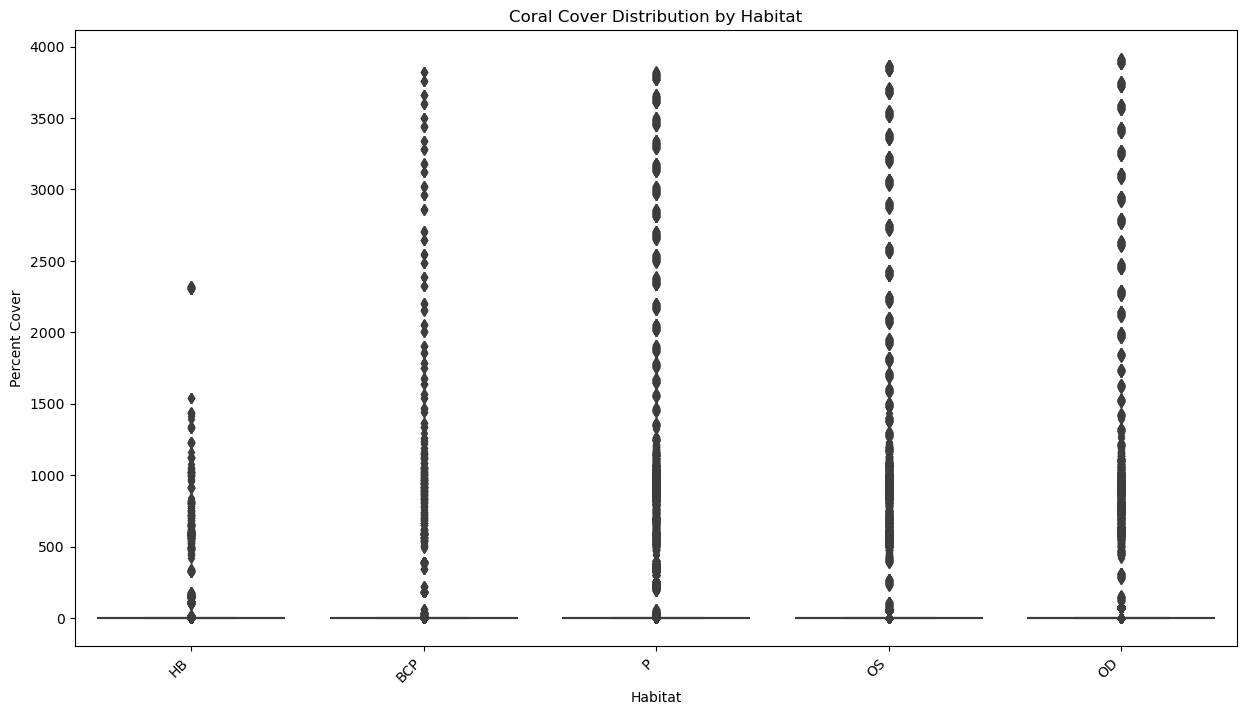

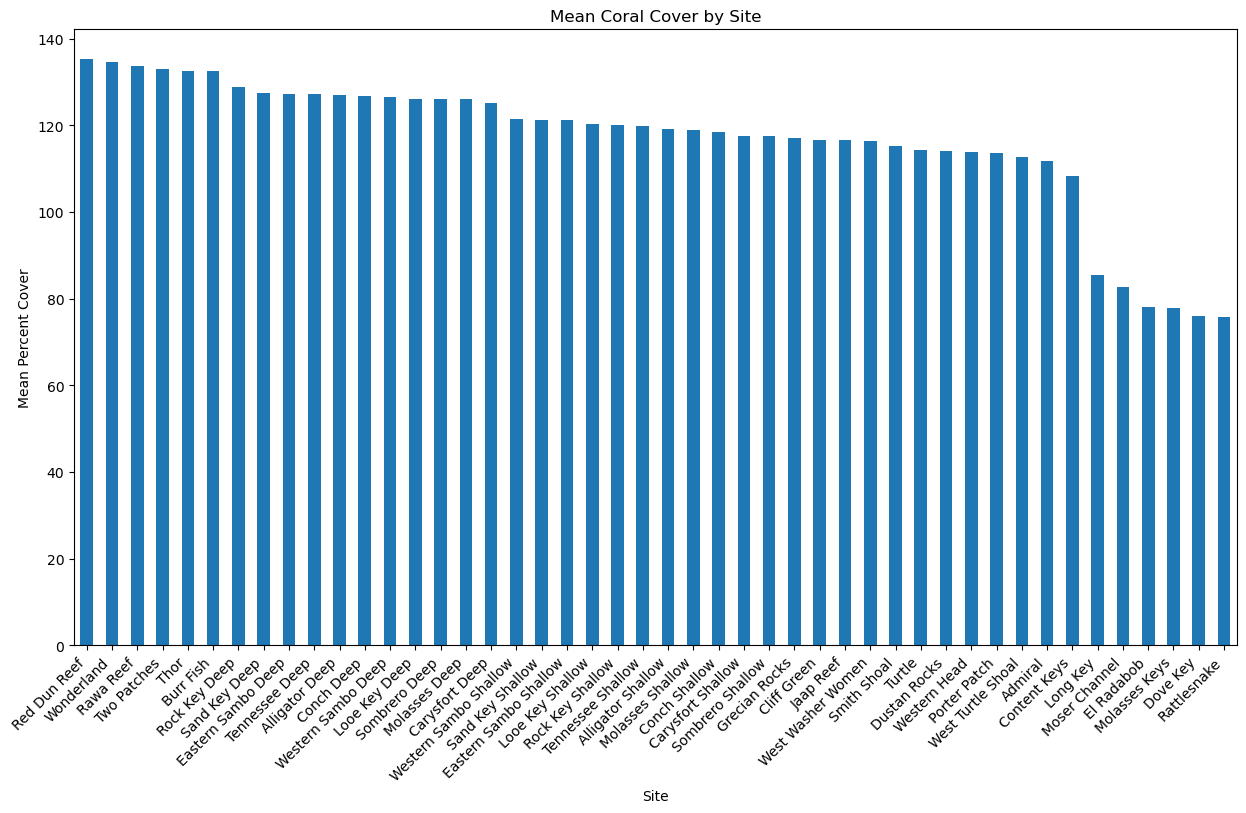

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#   1. Box Plots for Habitats

#   Prepare data for box plots
df_melted = df_coral.melt(id_vars='Habitat', value_vars=[col for col in df_coral.columns if pd.api.types.is_numeric_dtype(df_coral[col]) and col != 'Year'], var_name='Coral Species', value_name='Coral Cover')

#   Create box plots
plt.figure(figsize=(15, 8))
sns.boxplot(x='Habitat', y='Coral Cover', data=df_melted)
plt.title('Coral Cover Distribution by Habitat')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percent Cover')
plt.show()

#   2. Bar Charts for Sites

#   Prepare data for bar charts
mean_coral_cover_by_site_plot = mean_coral_cover_by_site.mean(axis=1)
mean_coral_cover_by_site_plot = mean_coral_cover_by_site_plot.sort_values(ascending=False)

#   Create bar chart
plt.figure(figsize=(15, 8))
mean_coral_cover_by_site_plot.plot(kind='bar')
plt.title('Mean Coral Cover by Site')
plt.xlabel('Site')
plt.ylabel('Mean Percent Cover')
plt.xticks(rotation=45, ha='right')
plt.show()

#   Implement Statistical Tests

**Purpose:**
Implement statistical tests to determine if the differences in coral cover across habitats are statistically significant. We will use ANOVA for comparing multiple habitats. For pairwise comparisons (if needed after ANOVA), we might consider t-tests or post-hoc tests (e.g., Tukey's HSD).

**Input:**

* Pandas DataFrame `df_coral` (from Step 1)

**Output:**

* Results of the ANOVA test comparing coral cover across habitats.

**Analysis Steps:**

1.  **Prepare Data:** Ensure the data is in a suitable format for the statistical test. We'll use the melted DataFrame (`df_melted`) from the visualization step.
2.  **Perform ANOVA:**
    * Use the `statsmodels` library to perform a one-way ANOVA test.
    * The dependent variable will be 'Coral Cover', and the independent variable (factor) will be 'Habitat'.
3.  **Interpret Results:** Examine the p-value from the ANOVA test. A small p-value (typically < 0.05) suggests that there are statistically significant differences in mean coral cover between at least one pair of habitats.

**Notes:**

* ANOVA (Analysis of Variance) is used to compare the means of two or more groups.
* The null hypothesis for ANOVA is that there is no significant difference in the means across the groups.
* If the ANOVA test is significant, it indicates that there's a difference, but it doesn't tell us which specific habitats are different from each other. For that, post-hoc tests would be needed.
* We will focus on comparing across habitats in this step for simplicity. Comparing across all sites would involve a very large number of groups, making ANOVA less straightforward and potentially requiring a two-way ANOVA if considering other factors.

In [10]:
import statsmodels.formula.api as smf
import statsmodels.api as sm  
import statsmodels.stats.multicomp as mc

#   Prepare Data (using the melted DataFrame from the visualization step)
df_melted = df_coral.melt(id_vars='Habitat', value_vars=[col for col in df_coral.columns if pd.api.types.is_numeric_dtype(df_coral[col]) and col != 'Year'], var_name='Coral_Species', value_name='Coral_Cover')

#   Perform One-Way ANOVA
formula = 'Coral_Cover ~ C(Habitat)'
lm = smf.ols(formula, data=df_melted).fit()
anova = sm.stats.anova_lm(lm)

#   Print ANOVA results
print("\nANOVA Results (Coral Cover by Habitat):\n", anova)

#   Optional: Post-hoc test (Tukey's HSD) if ANOVA is significant
if anova['PR(>F)'][0] < 0.05:
    m_comp = mc.pairwise_tukeyhsd(endog=df_melted['Coral_Cover'], groups=df_melted['Habitat'], alpha=0.05)
    print("\nPost-hoc Tukey's HSD Test Results:\n", m_comp)


ANOVA Results (Coral Cover by Habitat):
                   df        sum_sq       mean_sq          F        PR(>F)
C(Habitat)       4.0  1.739419e+07  4.348547e+06  32.587367  3.357669e-27
Residual    172387.0  2.300379e+10  1.334427e+05        NaN           NaN

Post-hoc Tukey's HSD Test Results:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   BCP     HB -32.0198    0.0  -46.932 -17.1075   True
   BCP     OD  15.2267 0.0031   3.6387  26.8147   True
   BCP     OS   7.6684 0.3568  -3.7695  19.1064  False
   BCP      P   7.4028 0.3968  -4.0665   18.872  False
    HB     OD  47.2464    0.0  35.8011  58.6918   True
    HB     OS  39.6882    0.0  28.3948  50.9816   True
    HB      P  39.4225    0.0  28.0975  50.7475   True
    OD     OS  -7.5582 0.0091 -13.8389  -1.2776   True
    OD      P  -7.8239 0.0068 -14.1613  -1.4865   True
    OS      P  -0.2657    1.0  -6.3243 

C:\Users\vijai\AppData\Local\Temp\ipykernel_21144\4003468815.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova['PR(>F)'][0] < 0.05:


#   Summarize Findings

## *Saving the File 'annova_results_habitat.csv'

## *Saving the File 'turkey_hsd_results_habitat.csv'

In [13]:
# Save the ANOVA results to a CSV file
anova.to_csv("anova_results_habitat.csv")

# If you performed the post-hoc test, you might want to save those results
# (Note: The Tukey's HSD result 'm_comp' is a NumPy array, you might need to convert it to a DataFrame for easy saving)
import pandas as pd
if 'm_comp' in locals():
    tukey_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
    tukey_df.to_csv("tukey_hsd_results_habitat.csv", index=False)



# FUTURE PREDICTION - Step 1: Calculate Annual Mean Coral Cover by Habitat

**Purpose:**
Calculate the annual mean coral cover for each habitat type to create time series data for forecasting.

**Input:**
* Pandas DataFrame `df_coral` (from previous notebooks)

**Output:**
* A Pandas DataFrame where the index is 'Year' and the columns are the mean coral cover for each habitat.

**Analysis Steps:**

1.  Group the `df_coral` DataFrame by both 'Year' and 'Habitat'.
2.  Calculate the mean coral cover across all coral species for each year and habitat combination.
3.  Unstack the 'Habitat' level of the resulting multi-index to have habitats as separate columns.
4.  Display the first few rows of the resulting DataFrame.

In [14]:
import pandas as pd

# Calculate the mean coral cover for each year and habitat
annual_mean_cover = df_coral.groupby(['Year', 'Habitat'])[
    [col for col in df_coral.columns if pd.api.types.is_numeric_dtype(df_coral[col]) and col != 'Year']
].mean()

# Calculate the overall mean cover across species for each year and habitat
annual_mean_cover_overall = annual_mean_cover.mean(axis=1).unstack()

# Display the first few rows
print(annual_mean_cover_overall.head())
print("\nShape of annual_mean_cover_overall:", annual_mean_cover_overall.shape)
print("\nIndex (Years):", annual_mean_cover_overall.index.unique())
print("\nColumns (Habitats):", annual_mean_cover_overall.columns.unique())

Habitat        BCP         HB         OD         OS          P
Year                                                          
1996     21.206531  15.956706  35.462713  28.604520  22.189120
1997     24.663837  19.959485  39.103305  32.832035  26.259594
1998     28.714929  24.033290  42.404934  36.132707  30.039581
1999     32.399880  27.536108  46.148026  39.818398  33.732114
2000     36.104546  31.636463  50.020477  43.737482  37.689817

Shape of annual_mean_cover_overall: (28, 5)

Index (Years): Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019,
       2020, 2021, 2022, 2023],
      dtype='int64', name='Year')

Columns (Habitats): Index(['BCP', 'HB', 'OD', 'OS', 'P'], dtype='object', name='Habitat')


#  Step 2: Implement ARIMA Forecasting

**Purpose:**
Apply the ARIMA (Autoregressive Integrated Moving Average) model to forecast the annual mean coral cover for each habitat.

**Input:**
* Pandas DataFrame `annual_mean_cover_overall` (from Step 1)

**Output:**
* Forecasted mean coral cover values for each habitat for the years 2024, 2025, and 2026.
* Visualizations showing the historical data and the ARIMA forecasts with confidence intervals for each habitat.

**Analysis Steps:**

1.  Import the `ARIMA` model from the `statsmodels` library.
2.  For each habitat:
    * Fit an ARIMA model to the historical annual mean coral cover data. We'll start with a simple order (e.g., (1, 1, 1)).
    * Generate forecasts for the next 3 years (2024, 2025, 2026).
    * Visualize the historical data and the forecasts with confidence intervals.

**Note:**
The order (1, 1, 1) is a starting point. A more rigorous analysis would involve checking for stationarity and analyzing ACF and PACF plots to determine the optimal order for each habitat.

C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Predi


ARIMA Forecast for Habitat: BCP
                   BCP
Year                  
2024-01-01  117.529883
2025-01-01  120.903134
2026-01-01  124.276381

ARIMA Forecast for Habitat: HB
                    HB
Year                  
2024-01-01  109.721624
2025-01-01  112.979449
2026-01-01  116.237252


C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\t


ARIMA Forecast for Habitat: OD
                    OD
Year                  
2024-01-01  131.966745
2025-01-01  135.380698
2026-01-01  138.794648

ARIMA Forecast for Habitat: OS
                    OS
Year                  
2024-01-01  125.689516
2025-01-01  129.125852
2026-01-01  132.562184


C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vijai\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: Val


ARIMA Forecast for Habitat: P
                     P
Year                  
2024-01-01  118.580527
2025-01-01  121.968798
2026-01-01  125.357065


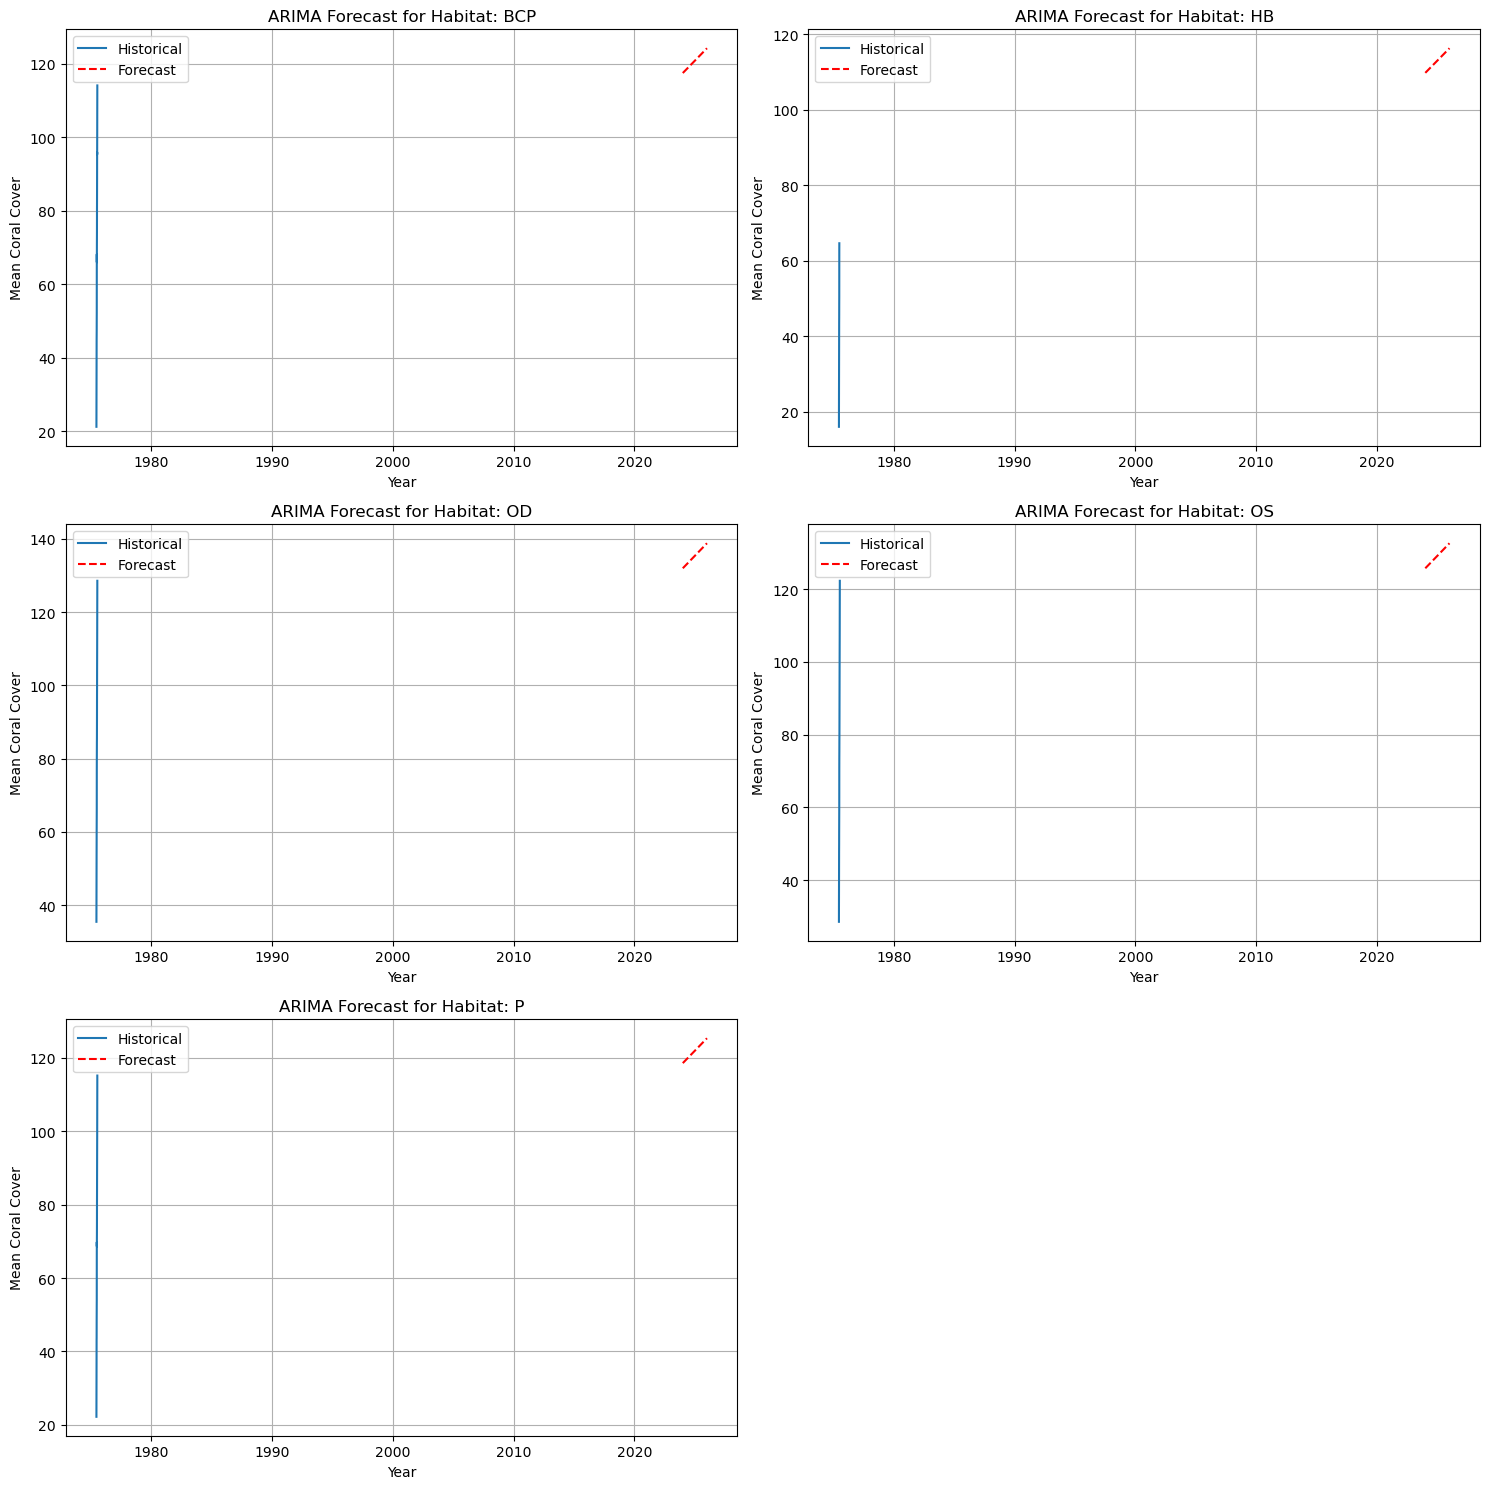

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np

# Years to forecast
forecast_years = [2024, 2025, 2026]
num_forecast_years = len(forecast_years)
num_habitats = annual_mean_cover_overall.shape[1]

# Determine the number of rows needed for the subplots
num_rows = (num_habitats + 1) // 2  # Ceiling division for 2 columns

# Create the figure and subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5 * num_rows))
axes = np.ravel(axes)  # Flatten the axes array for easy indexing

# Loop through each habitat and perform forecasting
for i, habitat in enumerate(annual_mean_cover_overall.columns):
    # Get the time series for the current habitat
    ts = annual_mean_cover_overall[habitat]

    try:
        # Fit the ARIMA model (order (1, 1, 1) as a starting point)
        model = ARIMA(ts, order=(1, 1, 1))
        model_fit = model.fit()

        # Generate forecasts
        forecast = model_fit.predict(start=len(ts), end=len(ts) + num_forecast_years - 1)

        # Create a DataFrame for the forecast
        forecast_df = pd.DataFrame({'Year': forecast_years, habitat: forecast.values})
        forecast_df['Year'] = pd.to_datetime(forecast_df['Year'], format='%Y')
        forecast_df = forecast_df.set_index('Year')

        # Plot on the corresponding subplot
        ax = axes[i]
        ax.plot(ts.index, ts.values, label='Historical')
        ax.plot(forecast_df.index, forecast_df[habitat].values, color='red', linestyle='--', label='Forecast')
        ax.set_title(f'ARIMA Forecast for Habitat: {habitat}')
        ax.set_xlabel('Year')
        ax.set_ylabel('Mean Coral Cover')
        ax.legend()
        ax.grid(True)

        print(f"\nARIMA Forecast for Habitat: {habitat}")
        print(forecast_df)

    except Exception as e:
        print(f"\nError fitting ARIMA for Habitat {habitat}: {e}")
        print("Skipping forecast for this habitat.")
        ax = axes[i]
        ax.text(0.5, 0.5, f"Error fitting ARIMA for {habitat}", horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, color='red')
        ax.set_title(f'ARIMA Forecast for Habitat: {habitat} (Error)')
        ax.axis('off')

# Remove any unused subplots if the number of habitats is odd
if num_habitats % 2 != 0:
    fig.delaxes(axes[num_habitats])

plt.tight_layout()
plt.show()